In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importation des données

In [2]:
data = pd.read_csv("../data/tweet.csv", sep=',')
data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


##### Forme du dataframe

In [3]:
data.shape

(7613, 5)

In [4]:
data.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

#### Description des données

In [5]:
data['text'].dtypes

dtype('O')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
data.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


##### Données manquantes

In [8]:
data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

##### Doublons

In [9]:
data.duplicated().sum()

0

#### Colonnes utiles

##### text : le contenu textuel du tweet
##### target : la variable cible (0 = normal, 1 = catastrophe)

In [10]:
print("Valeurs uniques de target :", data['target'].nunique())

Valeurs uniques de target : 2


target
0    0.57034
1    0.42966
Name: proportion, dtype: float64


<Axes: title={'center': 'Répartition des classes'}, xlabel='target'>

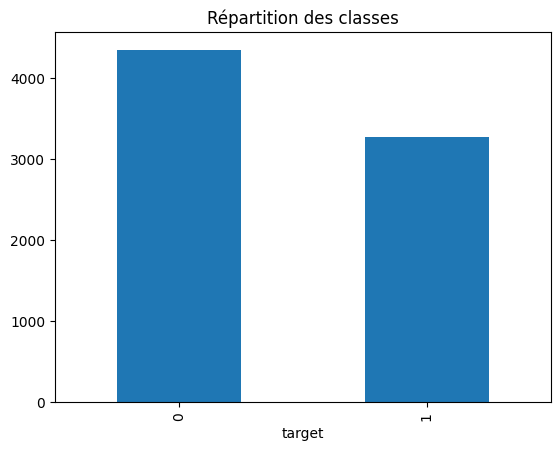

In [11]:
print(data['target'].value_counts(normalize=True))
data['target'].value_counts().plot(kind='bar', title='Répartition des classes')

#### Incohérence et outliers

In [12]:
print(f"Tweets dupliqués : {data['text'].duplicated().sum()}")

Tweets dupliqués : 110


In [13]:
#suppression des doublons
data['text'].drop_duplicates(inplace=True)

In [14]:
#Revérification
print(f"Tweets dupliqués : {data['text'].duplicated().sum()}")

Tweets dupliqués : 110


In [15]:
len(data)

7613

In [16]:
data_lenght = data['text'].apply(lambda x: len(str(x)))
print(data_lenght.describe())

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text, dtype: float64


##### On peut constater que les longueurs des textes sont très variantes les unes des autres. Avec un minimum de 7 caractères et un maximum de 157 caractères

In [17]:
print(data_lenght.value_counts(dropna=False).head(10))

text
136    401
139    275
138    256
140    218
137    210
135    191
134    128
133    114
132    113
130     91
Name: count, dtype: int64


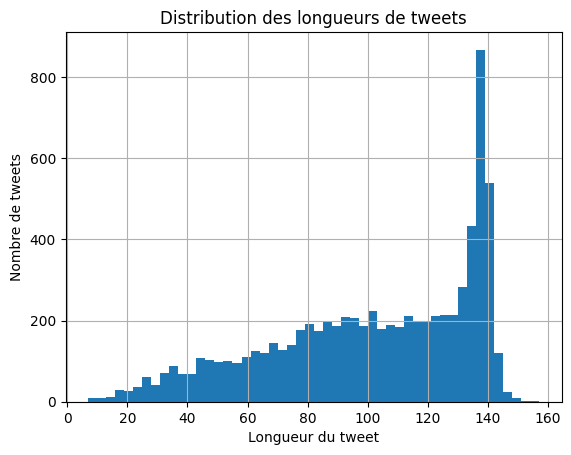

In [18]:
data_lenght.hist(bins=50)
plt.title("Distribution des longueurs de tweets")
plt.xlabel("Longueur du tweet")
plt.ylabel("Nombre de tweets")
plt.show()

In [19]:
# Afficher 10 tweets aléatoires
sample = data[['text', 'target']].sample(10, random_state=42)
for i, row in sample.iterrows():
    print(f"\nTweet : {row['text']}")
    print(f"Target : {row['target']}")


Tweet : So you have a new weapon that can cause un-imaginable destruction.
Target : 1

Tweet : The f$&amp;@ing things I do for #GISHWHES Just got soaked in a deluge going for pads and tampons. Thx @mishacollins @/@
Target : 0

Tweet : DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe CoL police can catch a pickpocket in Liverpool Stree... http://t.co/vXIn1gOq4Q
Target : 1

Tweet : Aftershock back to school kick off was great. I want to thank everyone for making it possible. What a great night.
Target : 0

Tweet : in response to trauma Children of Addicts develop a defensive self - one that decreases vulnerability. (3
Target : 0

Tweet : @Calum5SOS you look like you got caught in a rainstorm this is amazing and disgusting at the same time
Target : 0

Tweet : my favorite lady came to our volunteer meeting
hopefully joining her youth collision and i am excite http://t.co/Ij0wQ490cS
Target : 1

Tweet : @brianroemmele UX fail of EMV - people want to insert and remove quickly like a gas pump s

##### Cette partie permet d'observer une certaines incohérence entre la target et le tweet. Sachant qu'un target de 1 devrait afficher un tweet catastrophique et un target de 0 un tweet normal. La cible peut parfois être prévisible grâce à des termes présents dans le tweet, mais certaines restent encore imprévisibles.